# Intro to Matlab

As a demo of the language, plot sin and cos on the same axis:

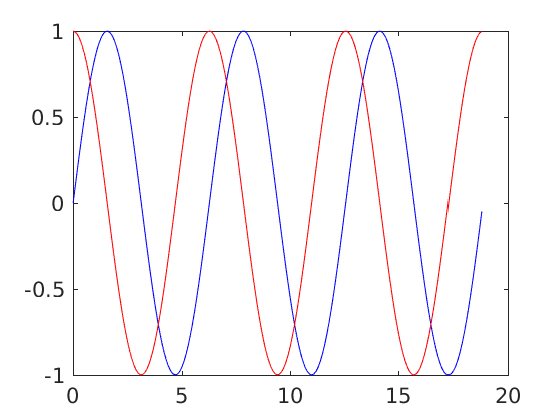

In [1]:
% define an array from 0 to 6*pi with steps of 0.1 using start:by:end
x = 0:0.1:6*pi;

% plot the sin of these points
plot(x, sin(x), 'b');

% keep the plot open
hold on;

% plot the cos of the points
plot(x, cos(x), 'r')

# Netcdf

Matlab comes with native netcdf capability. If you know the url of the dataset that you are interested in, you can display all the info about that datset using **ncdisp(data_url)** or **ncdisp(data_url, variable)** to look at just one variable.

In [16]:
data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/butler.nc';
variable = 'AirTC_Avg';

At this point you haven't pulled over any actual data, to do that you use **ncread(data_url, variable)**. To read data attributes, use **ncreadatt(data_url, variable, attribute_name)**.

In [17]:
AirTData  = ncread(data_url, variable);
AirTUnits = ncreadatt(data_url, variable, 'units');

In [18]:
timeData = ncread(data_url, 'time');
timeUnits = ncreadatt(data_url, 'time', 'units');

In this NetCDF file the time units tell us that time is stored as seconds since 1970-01-01. That time format is often called POSIX time. To convert to a more legible time format, we can use the **datetime** function:

In [19]:
% convert time to a vector of datetimes
time = datetime( timeData, 'ConvertFrom', 'posixtime' );

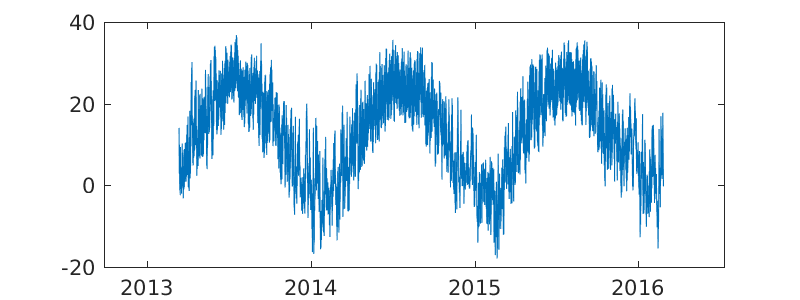

In [20]:
plot(time, AirTData)

## Time slices

We often are more interested in looking at one particular time, rather than the whole record. To avoid loading all of the data, it is best to slice by the index of the time variable. 

In [21]:
%plot -s 800,300

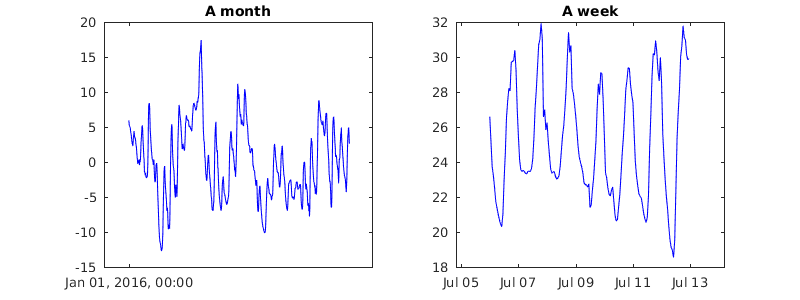

In [22]:
% slice the dataset or choose a date period (such as a month)
start = find(time=='2016-01-01');
count = find(time=='2016-01-31')-start;
AirT = ncread(data_url, variable, start, count, 1);
t = time(start:start+count-1);
a_month = table(t, AirT);

% or a week
start = find(time=='2015-07-06 00:00:00');
count = find(time=='2015-07-13 00:00:00')-start;
AirT= ncread(data_url, variable, start, count, 1);
t = time(start:start+count-1);
a_week = table(t, AirT);

subplot(1,2,1);
plot(a_month.t, a_month.AirT, 'b');
title('A month');
set(gca,'fontsize', 6);

subplot(1,2,2);
plot(a_week.t, a_week.AirT, 'b');
title('A week');
set(gca,'fontsize', 6);

## Multiple variables

To plot several variables over a defined period of time, we can use a list of variables, and a slice of time. If we want to save time by not reading in all of the data unnecessarily, we can find the indexers for the times that we are interested in. Then we can grab just the data for the timespan of interest

In [40]:
start = find(time=='2015-07-06');
count = find(time=='2015-07-13')-start;

Rain = ncread(data_url,'Rain_mm_3_Tot', start, count, 1);
VW = ncread(data_url,'VW', start, count, 1);
t = time(start:start+count-1);

a_week = table(t, Rain, VW);

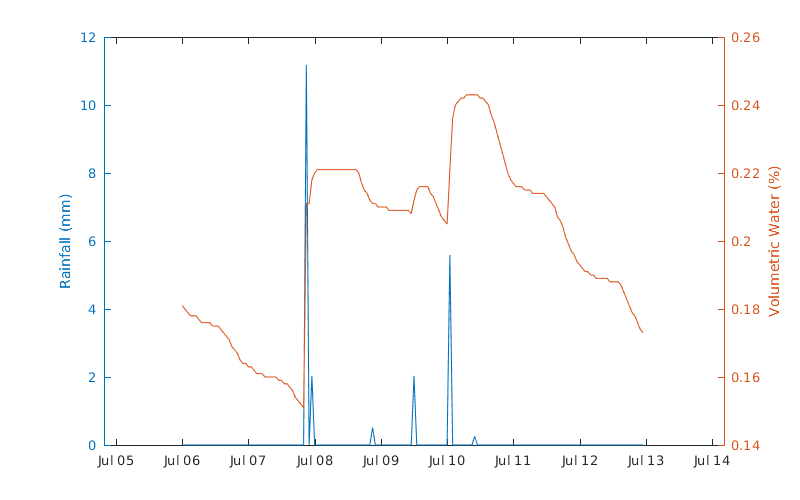

In [41]:
[ax,p1,p2] = plotyy(a_week.t, a_week.Rain, a_week.t, a_week.VW);

ylabel(ax(1),'Rainfall (mm)') % label left y-axis
ylabel(ax(2),'Volumetric Water (%)') % label right y-axis
set(ax(1:2),'fontsize', 6);

In [26]:
%plot -s 800,500

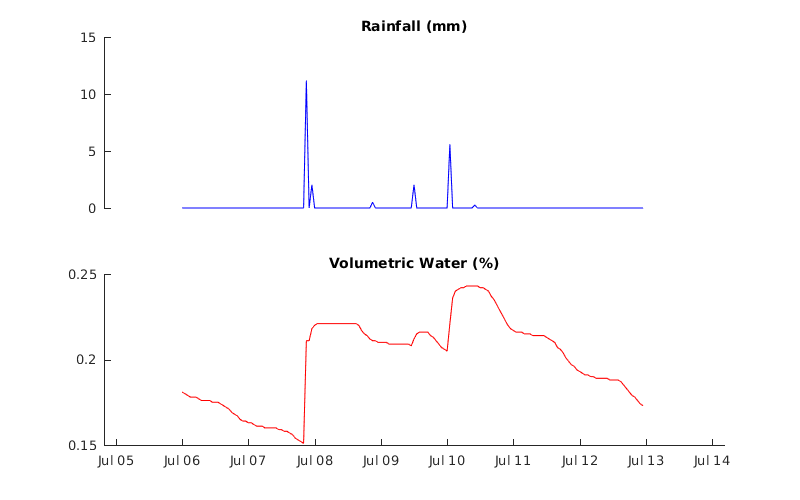

In [27]:
h(1) = subplot(2,1,1);
plot(a_week.t, a_week.Rain, 'b');
title('Rainfall (mm)');

h(2) = subplot(2,1,2);
plot(a_week.t, a_week.VW, 'r');
title('Volumetric Water (%)');

set(h(1),'xcolor','w');
set(h(1:2),'fontsize', 6);
set(h(1:2), 'box', 'off');

## Finding rainy days

## Rain on wet soil

## Monthly rainfall

## Multiple sites

## Using functions

In [ ]:
broadmead_rain1 = select('broadmead', 'Rain_1_mm_Tot', '2016-02-23 12:00:00', '2016-02-26 12:00:00')

In [ ]:
site = 'broadmead';
variable = 'Rain_1_mm_Tot';
startTime = '2016-02-23 12:00:00';
endTime = '2016-02-26 12:00:00';
data_url = strcat('http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/',site,'.nc');

timeData = ncread(data_url, 'time');
time = datetime( timeData, 'ConvertFrom', 'posixtime' );

start = find(time==startTime);
count = find(time==endTime)-start;
var = ncread(data_url,variable, start, count, 1);
t = time(start:start+count-1);

df = table(t, var);
df.Properties.VariableNames = {'t' variable};

In [ ]:
df

In [52]:
start

start =

       20083


In [60]:
start = find(time=='2016-02-23 12:00:00')

start =

       25635
